Missing fabio module. Please install it if you need open some tiff images from the sCMOS camera
LaueToolsProjectFolder ..\lauetools\LaueTools
you are using python 3


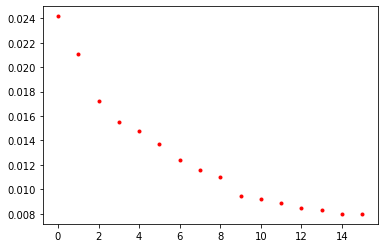

In [2]:
import sys
sys.path.append("..")
import os

import lauetools.LaueTools.IOimagefile as IOimage

import matplotlib.pyplot as plt
import numpy as np
from scipy import fft

def reduce(im, sx, sy, lp, hp):
    SX, SY = im.shape
    im_ = im.reshape(sx, SX // sx, sy,SY // sy).mean(-1).mean(1)
    #ss=cv2.dct(im_)
    ss=fft.dctn(im_)
    ss[:lp, :] = 0.
    ss[:, :lp] = 0.
    ss[hp:, :] = 0.
    ss[:, hp:] = 0.
    #return cv2.idct(ss), ss[lp: hp, lp: hp].ravel()
    return fft.idctn(ss), ss[lp: hp, lp: hp].ravel()

features=np.load('features4096.npy')

features=features.reshape((64*146,4096))

from sklearn.decomposition import PCA

n_pca=16
pca = PCA(n_components=n_pca, svd_solver='randomized')

pca_features=pca.fit_transform(features)#components_

plt.plot(np.arange(n_pca), pca.explained_variance_ratio_,'r.')


In [4]:
from sklearn.cluster import AffinityPropagation


af = AffinityPropagation(preference=-50).fit(pca_features)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

colors=np.random.uniform(size=(n_clusters_,3))

print(n_clusters_)

print(labels.shape)

labels=labels.reshape((64,146))
im=np.zeros(tuple(list(labels.shape)+[3]))

for i in range(64):
    for j in range(146):
        im[i,j]=colors[labels[i,j]]
            



C:\Users\fengg\anaconda3\lib\site-packages\scikit_learn-0.24.dev0-py3.8-win-amd64.egg\sklearn\cluster\_affinity_propagation.py:146: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(("'random_state' has been introduced in 0.23. "


477
(9344,)


In [13]:
from sklearn.metrics import silhouette_score

labels=labels.ravel()
print(silhouette_score(pca_features, labels))#, metric='euclidean'))


0.18954596197731796


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 1

(array([15., 17., 27., 24., 35., 21., 49., 20., 19.,  9., 15., 10., 14.,
        29., 13.,  6.,  7.,  8., 10.,  7., 12.,  6.,  3.,  5.,  3.,  9.,
        13.,  7.,  5.,  2.,  2.,  5.,  0.,  3.,  4.,  4.,  1.,  1.,  2.,
         1.,  4.,  0.,  0.,  0.,  1.,  1.,  2.,  0.,  1.,  1.,  1.,  0.,
         0.,  2.,  0.,  1.,  2.,  1.,  0.,  1.,  1.,  0.,  0.,  2.,  1.,
         2.,  0.,  2.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,
         0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  2.               ,   3.15             ,   4.3              ,
          5.449999999999999,   6.6              ,   7.75             ,
          8.899999999999999,  10.049999999999999,  11.2              ,
         12.35             ,  13.5              ,  14.649999999999999,
         15.799999999999999,  16.95             ,  18.099999999999998,
         19.25             ,  20.4              ,  21.549999999999997,
        

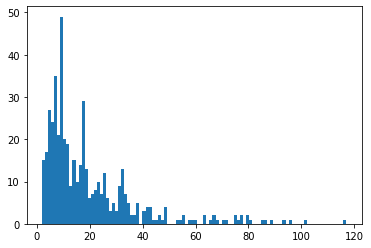

In [14]:
counts = np.unique(labels, return_counts=True)[1]
print(np.unique(labels, return_counts=True))
print(labels.min(),labels.max())
#for i in range(1020):
#    counts[i]=labels.c
print(len(counts))
plt.hist(counts,bins=100)

True

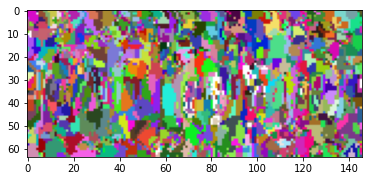

In [23]:
#counts=counts.reshape((64,146))
labels=labels.reshape((64,146))
im=np.zeros(tuple(list(labels.shape)+[3]))

for i in range(64):
    for j in range(146):
        #if counts[labels[i,j]]<10:
        #    im[i,j]=np.array([1.,1.,1.])
        #else:
        im[i,j]=colors[labels[i,j]]

import cv2

img=im.copy()
img=np.rint(img*256).astype(np.uint8)
for i in range(64):
    for j in range(146):
        if counts[labels[i,j]]<5:
            img[i,j]=np.array([255,255,255])
        #else:
#print(img)
plt.imshow(img)
cv2.imwrite("PCA16-AffinityPropagation.tiff", img)

CCDLabel in readCCDimage TIFF Format
----> Using libtiff...
(1024, 1024)
CCDLabel in readCCDimage TIFF Format
----> Using libtiff...
(1024, 1024)
CCDLabel in readCCDimage TIFF Format
----> Using libtiff...
(1024, 1024)
CCDLabel in readCCDimage TIFF Format
----> Using libtiff...
(1024, 1024)
CCDLabel in readCCDimage TIFF Format
----> Using libtiff...
(1024, 1024)
CCDLabel in readCCDimage TIFF Format
----> Using libtiff...
(1024, 1024)
CCDLabel in readCCDimage TIFF Format
----> Using libtiff...
(1024, 1024)
CCDLabel in readCCDimage TIFF Format
----> Using libtiff...
(1024, 1024)
CCDLabel in readCCDimage TIFF Format
----> Using libtiff...
(1024, 1024)


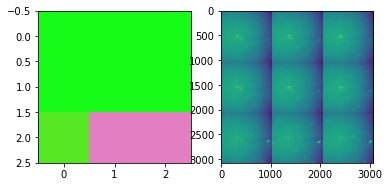

In [41]:
nx,ny=3,3


plt.subplot(1,2,1)
plt.imshow(img[25:25+nx,78:78+ny])

plt.subplot(1,2,2)
subims=np.zeros((nx*1024,ny*1024))

for i in range(25,25+nx):
    for j in range(78,78+ny):
        if (i >= 100):
            str_i=str(i)
        else:
            if (i >= 10):
                str_i='0'+str(i)
            else:
                str_i='00'+str(i)
        if (j >= 100):
            str_j=str(j)
        else:
            if (j >= 10):
                str_j='0'+str(j)
            else:
                str_j='00'+str(j)
        path="../XRD_images/2nd_saving/"+"140_S"+str_i+"_C"+str_j+".TIFF"
        im=IOimage.readCCDimage(path,CCDLabel='TIFF Format')[0]
        print(np.array(im).shape)
        i_,j_=i-25,j-78
        subims[i_*1024:(i_+1)*1024,j_*1024:(j_+1)*1024]=np.array(im)
plt.imshow(np.log(subims))

CCDLabel in readCCDimage TIFF Format
----> Using libtiff...
(1024, 1024)
CCDLabel in readCCDimage TIFF Format
----> Using libtiff...
(1024, 1024)
CCDLabel in readCCDimage TIFF Format
----> Using libtiff...
(1024, 1024)
CCDLabel in readCCDimage TIFF Format
----> Using libtiff...
(1024, 1024)
CCDLabel in readCCDimage TIFF Format
----> Using libtiff...
(1024, 1024)
CCDLabel in readCCDimage TIFF Format
----> Using libtiff...
(1024, 1024)
CCDLabel in readCCDimage TIFF Format
----> Using libtiff...
(1024, 1024)
CCDLabel in readCCDimage TIFF Format
----> Using libtiff...
(1024, 1024)
CCDLabel in readCCDimage TIFF Format
----> Using libtiff...
(1024, 1024)
CCDLabel in readCCDimage TIFF Format
----> Using libtiff...
(1024, 1024)
CCDLabel in readCCDimage TIFF Format
----> Using libtiff...
(1024, 1024)
CCDLabel in readCCDimage TIFF Format
----> Using libtiff...
(1024, 1024)
CCDLabel in readCCDimage TIFF Format
----> Using libtiff...
(1024, 1024)
CCDLabel in readCCDimage TIFF Format
----> Using li

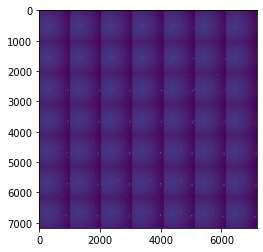

In [37]:
nx,ny=7,7
subims=np.zeros((nx*1024,ny*1024))

for i in range(25,25+nx):
    for j in range(78,78+ny):
        if (i >= 100):
            str_i=str(i)
        else:
            if (i >= 10):
                str_i='0'+str(i)
            else:
                str_i='00'+str(i)
        if (j >= 100):
            str_j=str(j)
        else:
            if (j >= 10):
                str_j='0'+str(j)
            else:
                str_j='00'+str(j)
        path="../XRD_images/2nd_saving/"+"140_S"+str_i+"_C"+str_j+".TIFF"
        im=IOimage.readCCDimage(path,CCDLabel='TIFF Format')[0]
        print(np.array(im).shape)
        i_,j_=i-25,j-78
        subims[i_*1024:(i_+1)*1024,j_*1024:(j_+1)*1024]=np.array(im)
plt.imshow(subims)

True

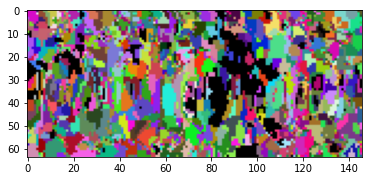

In [10]:
import cv2

img=im.copy()
img=np.rint(img*256).astype(np.uint8)
#print(img)
plt.imshow(img)
cv2.imwrite("ddd.tiff", img)

CCDLabel in readCCDimage TIFF Format
----> Using libtiff...


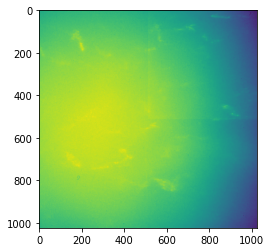

In [35]:
filename="140_S032_C062.TIFF"
dirname="../XRD_images/2nd_saving/"

x=IOimage.readCCDimage(filename=filename,CCDLabel='TIFF Format',dirname=dirname)
plt.imshow(np.log(x[0]))


CCDLabel in readCCDimage TIFF Format
----> Using libtiff...


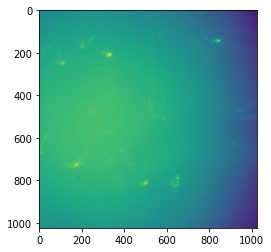

In [36]:
filename="140_S039_C062.TIFF"
dirname="../XRD_images/2nd_saving/"

x=IOimage.readCCDimage(filename=filename,CCDLabel='TIFF Format',dirname=dirname)
plt.imshow(np.log(x[0]))
